<a href="https://colab.research.google.com/github/Hf301/Hf301/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd

In [8]:
# Устанавливаем библиотеку Kaggle
! pip install kaggle
# Создаём каталог с именем “.kaggle”:
! mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
# Копируем файл “kaggle.json” в созданный каталог:
! cp kaggle.json ~/.kaggle/

In [10]:
# Назнаем необходимое разрешение для этого файла:
! chmod 600 ~/.kaggle/kaggle.json
# Загрузка набора данных:
! kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
# Извлекаем данные:
! unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [12]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [13]:
train_df.shape

(1460, 81)

In [14]:
test_df.shape

(1459, 80)

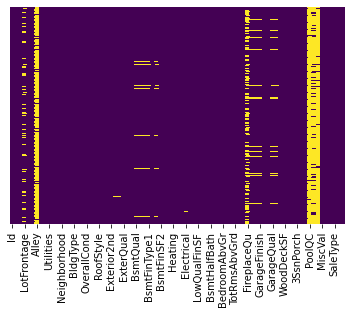

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Смотрим нулевые значения с помощью тепловой карты.

In [16]:
train_df['SalePrice'].describe() # Смотрим таргет.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


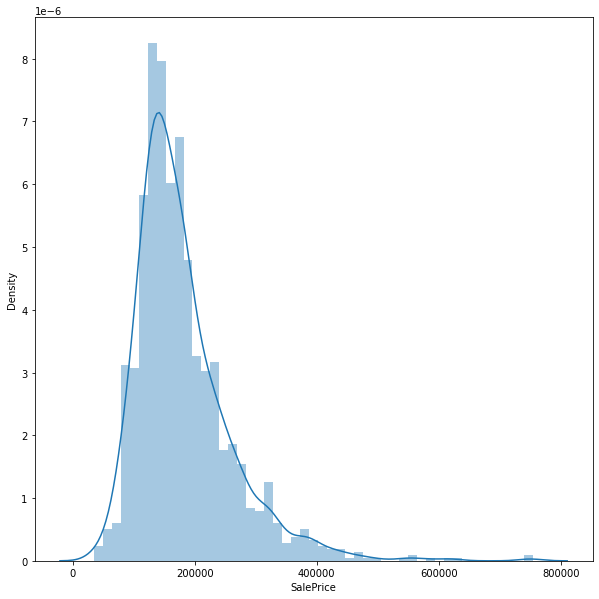

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
sns.distplot(train_df['SalePrice']) # Есть отклонение.

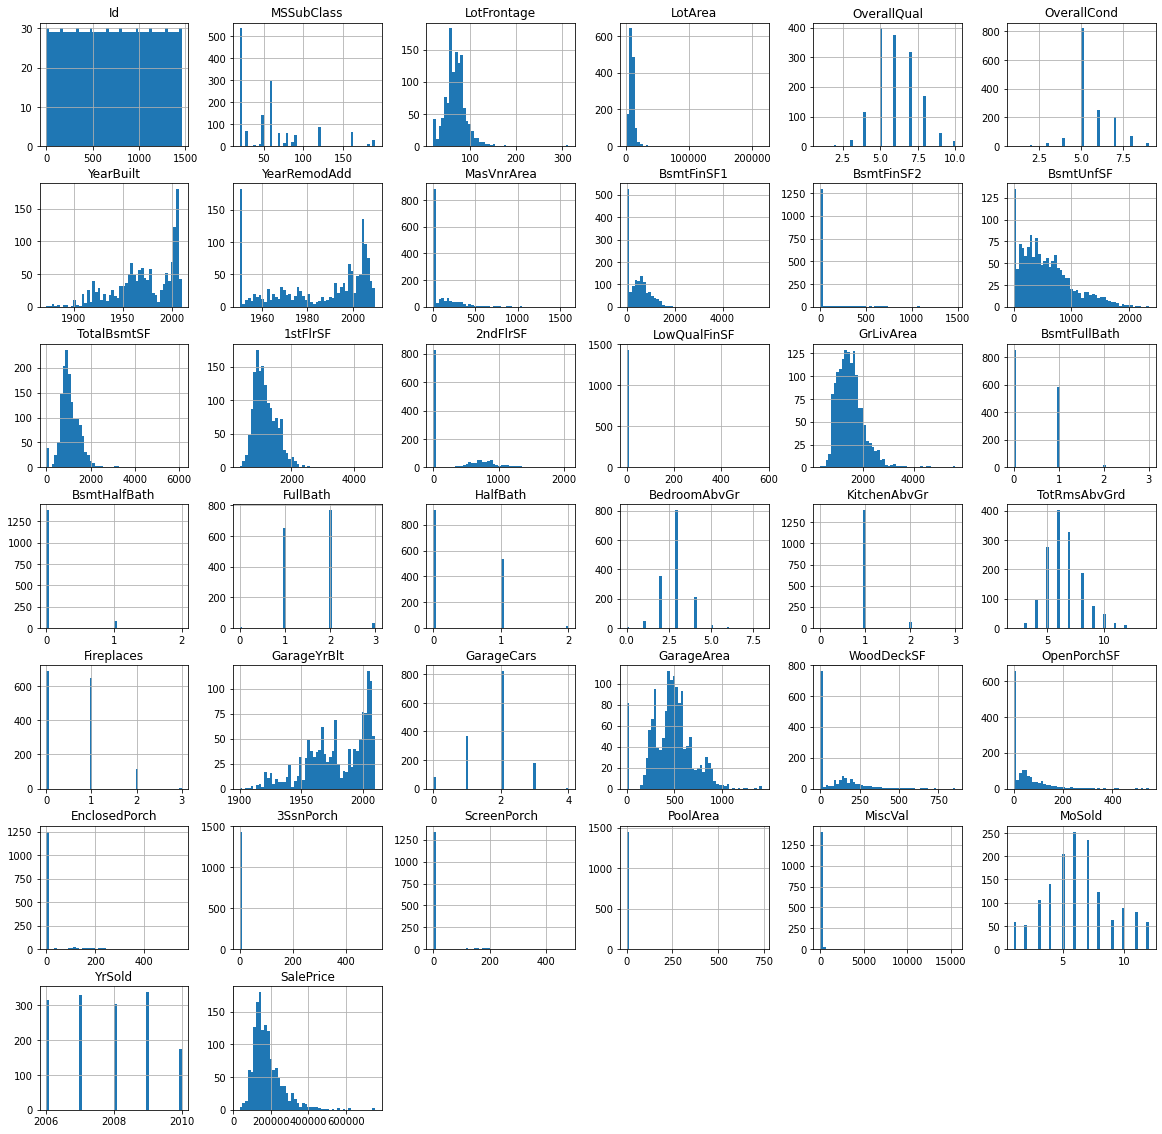

In [18]:
train_df.hist(bins=50,figsize=(20,20))
plt.show()

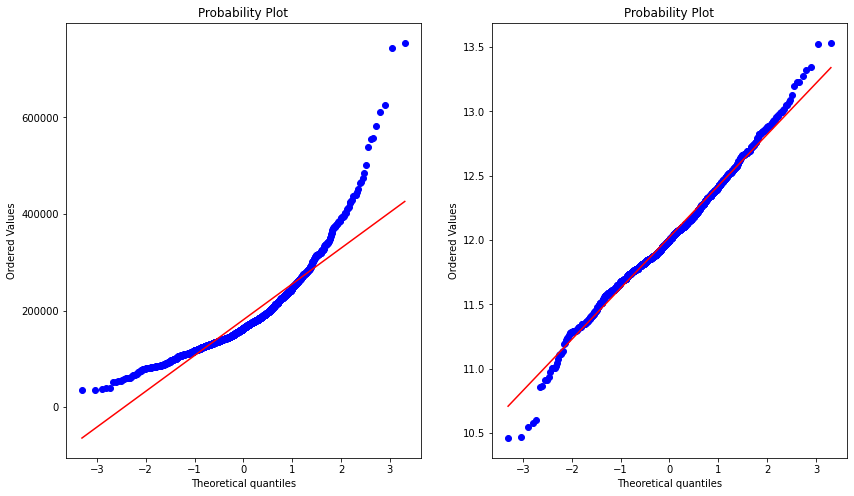

In [19]:
from scipy import stats
fig = plt.figure(figsize = (14,8))
fig.add_subplot(1,2,1) # Распределение на необработанных данных
res = stats.probplot(train_df['SalePrice'], plot=plt)
fig.add_subplot(1,2,2) # Распределение при условии, что мы прологарифмировали 'SalePrice'
res = stats.probplot(np.log1p(train_df['SalePrice']), plot=plt)

In [20]:
# train_df['SalePrice'] = np.log1p(train_df['SalePrice']) # Нормализуем дистрибутивы.

In [21]:
# f, ax = plt.subplots(figsize=(10, 10))
# sns.distplot(train_df['SalePrice'])

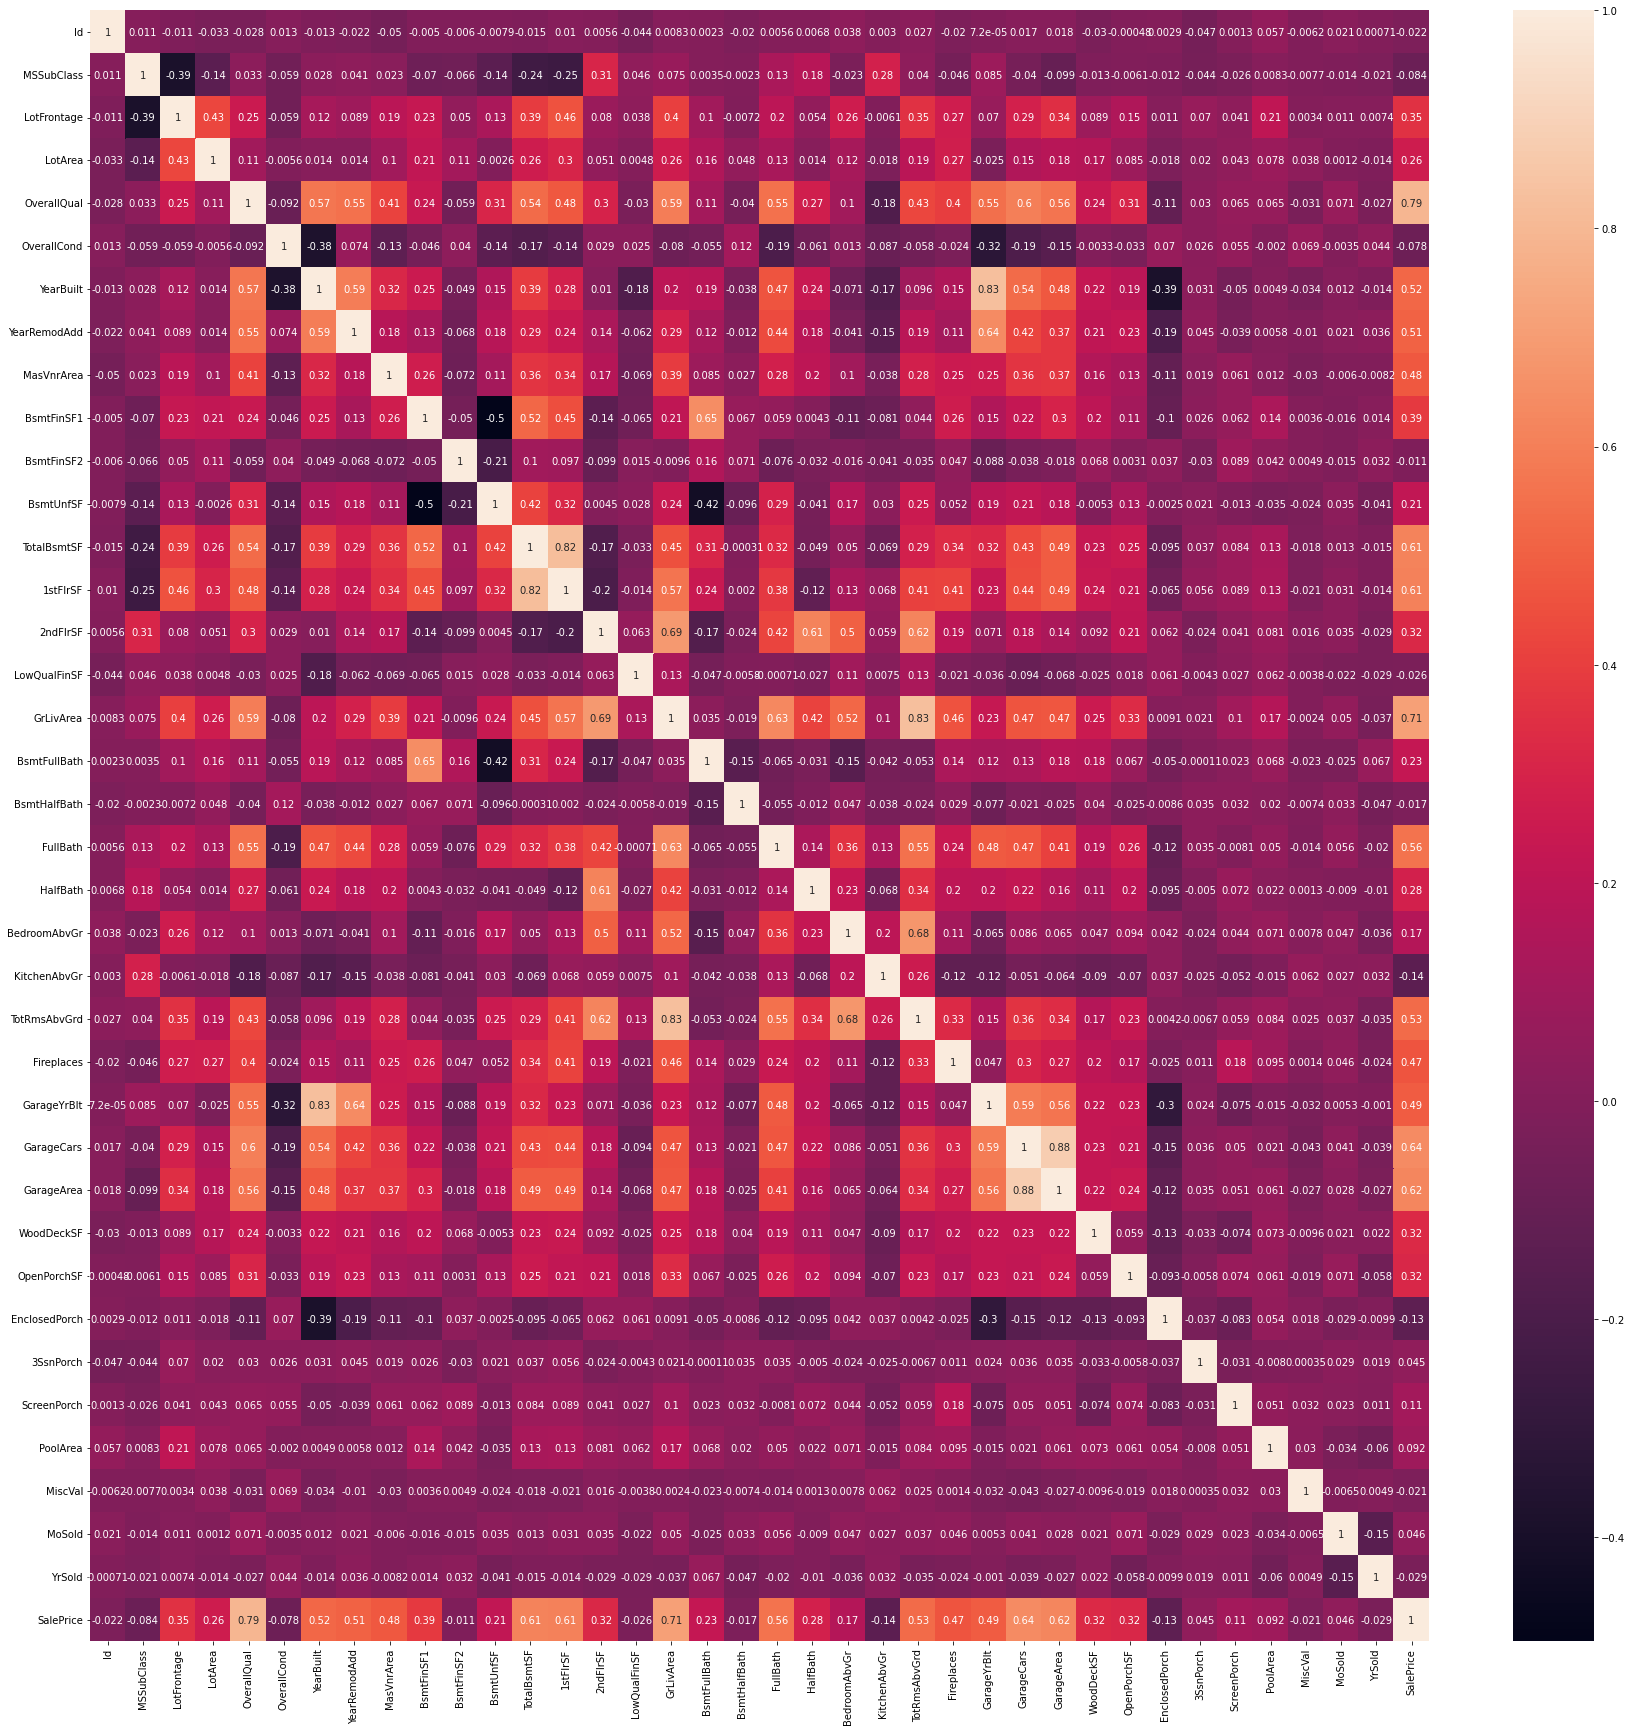

In [22]:
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(), annot=True, annot_kws={'size':10})
plt.show()

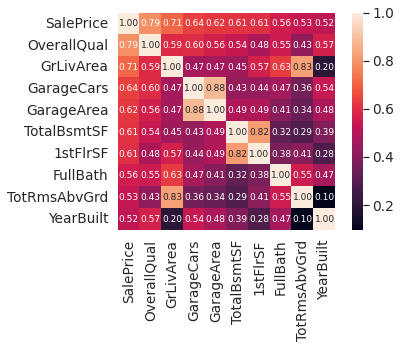

In [23]:
corrmat = train_df.corr()
k = 10 # количество коррелирующих признаков, которое мы хотим увидеть
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 9}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

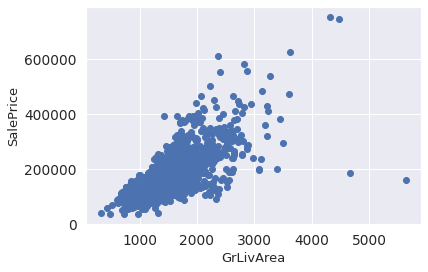

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

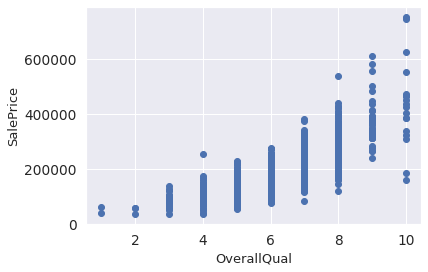

In [25]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['OverallQual'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

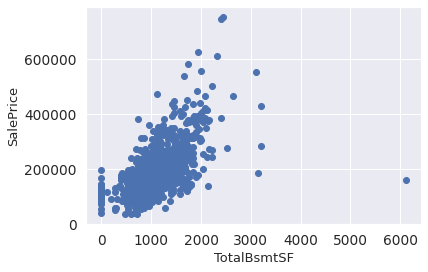

In [26]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['TotalBsmtSF'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

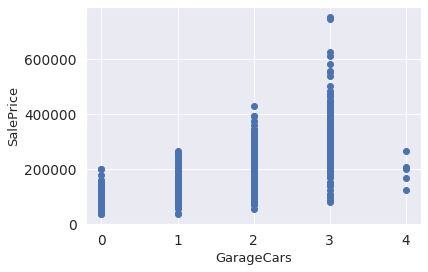

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageCars'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()

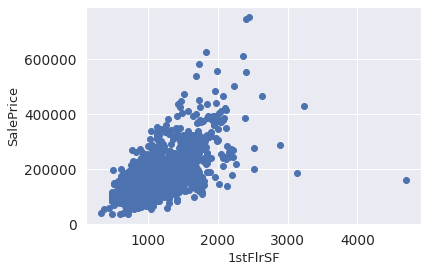

In [28]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['1stFlrSF'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

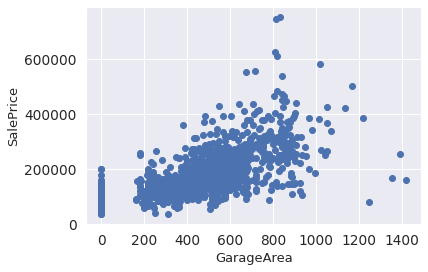

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

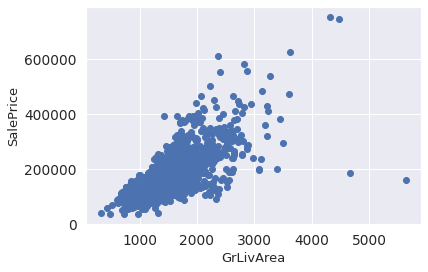

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

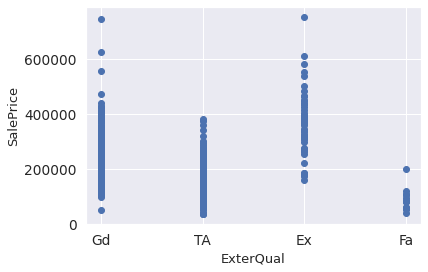

In [31]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['ExterQual'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('ExterQual', fontsize=13)
plt.show()

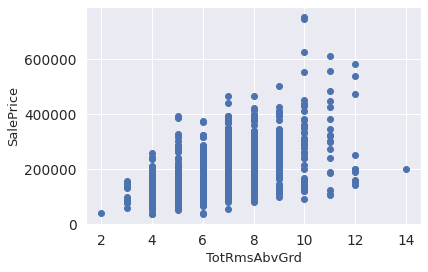

In [32]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['TotRmsAbvGrd'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotRmsAbvGrd', fontsize=13)
plt.show()

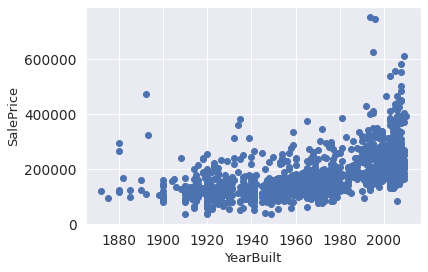

In [33]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['YearBuilt'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearBuilt', fontsize=13)
plt.show()

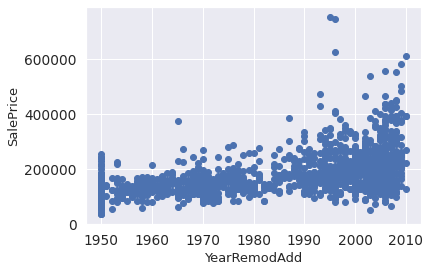

In [34]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['YearRemodAdd'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('YearRemodAdd', fontsize=13)
plt.show()

In [35]:
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 3000) & (train_df['SalePrice'] > 100000)].index)
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 2500) & (train_df['SalePrice'] > 400000)].index)
train_df = train_df.drop(train_df[(train_df['OverallQual'] < 3) & (train_df['SalePrice'] < 550000)].index)
train_df = train_df.drop(train_df[(train_df['OverallQual'] > 9) & (train_df['SalePrice'] < 500000)].index)
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF'] > 2000) & (train_df['SalePrice'] > 100000)].index)
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF'] < 1) & (train_df['SalePrice'] > 0)].index)
train_df = train_df.drop(train_df[(train_df['GarageCars'] > 3) & (train_df['SalePrice'] > 100000)].index)
train_df = train_df.drop(train_df[(train_df['1stFlrSF'] > 2500) & (train_df['SalePrice'] > 100000)].index)
train_df = train_df.drop(train_df[(train_df['GarageArea'] > 1000) & (train_df['SalePrice'] > 0)].index)
train_df = train_df.drop(train_df[(train_df['GarageArea'] < 1) & (train_df['SalePrice'] > 0)].index)

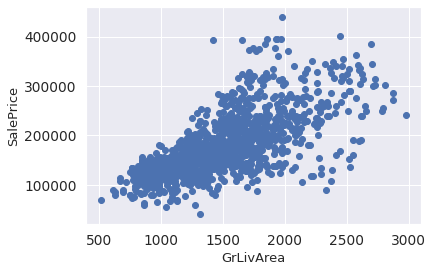

In [36]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

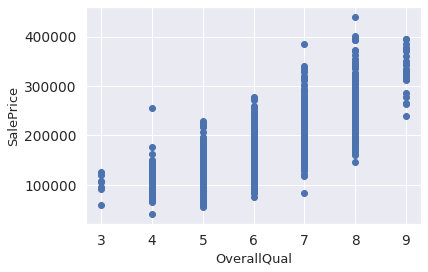

In [37]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['OverallQual'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

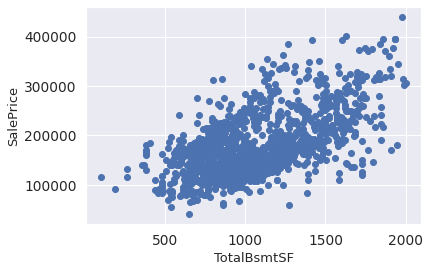

In [38]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['TotalBsmtSF'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

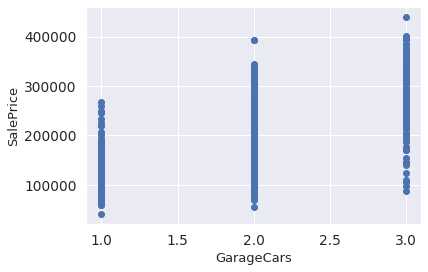

In [39]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageCars'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageCars', fontsize=13)
plt.show()

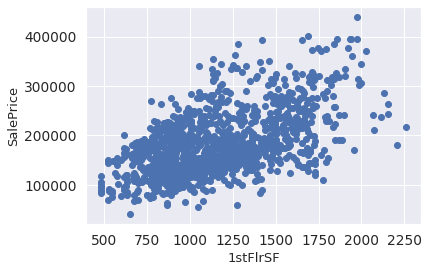

In [40]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['1stFlrSF'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()

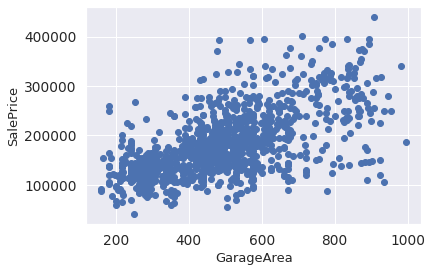

In [41]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

In [42]:
train_df.isnull().sum().sort_values(ascending=False).head(20) # Пропущенные значения

PoolQC          1278
MiscFeature     1234
Alley           1201
Fence           1028
FireplaceQu      589
LotFrontage      239
MasVnrType         6
MasVnrArea         6
BsmtExposure       1
Electrical         1
FullBath           0
BsmtHalfBath       0
GarageYrBlt        0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
BsmtFullBath       0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
dtype: int64

Text(0.5, 1.0, 'Общее количество пустых значений ')

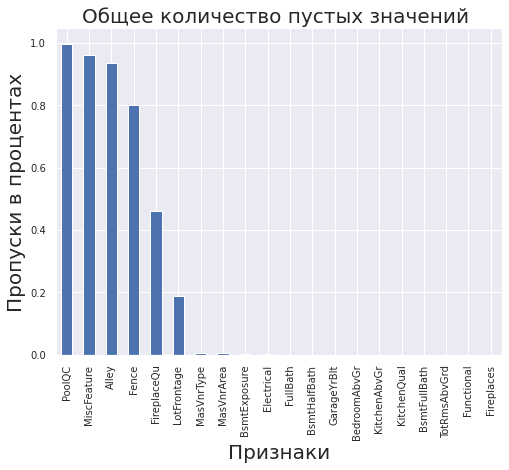

In [43]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Признаки", fontsize = 20)
plt.ylabel("Пропуски в процентах", fontsize = 20)
plt.title("Общее количество пустых значений ", fontsize = 20)

In [44]:
train_data = train_df.drop(columns=['Id'], axis=1) # 'Id' ни на что не влияет.
test_data = test_df.drop(columns=['Id'], axis=1)

In [45]:
Target = 'SalePrice'
train_data.dropna(axis=0, subset=[Target], inplace=True)

In [46]:
def missing(df): # Разбираемся с пропущенными данными.
    num = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']] # Числа отбираем по формату int64 и float64.
    cat = [cname for cname in df.columns if df[cname].dtype == "object"] # Категориальные значения отбираем по формату object.
    values = {}
    for a in num:
        values[a] = df[a].mean()
    for a in cat:
        values[a] = 'Not'

    df.fillna(value=values, inplace=True)
    
missing(train_data)
missing(test_data)

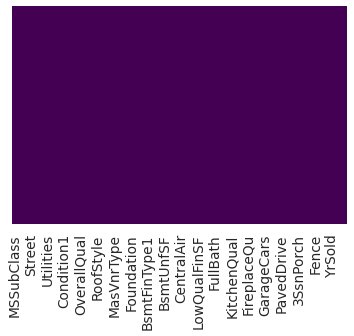

In [47]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
train_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [49]:
test_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [50]:
train_data = train_data.replace({'NONE':0,'NO':0,'No':0,'nan':0,'Not':0,
                   'RH':1, 'RL':2, 'RM':3, 'FV':4, 'C (all)':5, 
                   'Pave':1, 'Grvl':2,
                   'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4,
                   'Lvl':1, 'HLS':2, 'Bnk':3, 'Low':4,
                   'AllPub':1, 'NoSeWa':2,
                   'Inside':1, 'Corner':2, 'FR2':3, 'CulDSac':4, 'FR3':5,
                   'Gtl':1, 'Mod':2, 'Sev':3,
                   'NAmes':1, 'Gilbert':2, 'StoneBr':3, 'BrDale':4, 'NPkVill':5, 'NridgHt':6,'Blmngtn':7, 'NoRidge':8,
                   'Somerst':9, 'SawyerW':10, 'Sawyer':11, 'NWAmes':12, 'OldTown':13, 'BrkSide':14, 'ClearCr':15,
                   'SWISU':16, 'Edwards':17, 'CollgCr':18, 'Crawfor':19, 'Blueste':20, 'IDOTRR':21, 'Mitchel':22,
                   'Timber':23, 'MeadowV':24,'Veenker':25,
                   'Feedr':1, 'Norm':2, 'PosN':3, 'RRNe':4, 'Artery':5, 'RRNn':6, 'PosA':7, 'RRAn':8, 'RRAe':9,
                   '1Fam':1, 'TwnhsE':2, 'Twnhs':3, 'Duplex':4, '2fmCon':5,
                   '1Story':1, '2Story':2, 'SLvl':3, '1.5Fin':4, 'SFoyer':5, '2.5Unf':6, '1.5Unf':7,'2.5Fin':8,
                   'Gable':1, 'Hip':2, 'Gambrel':3, 'Flat':4, 'Mansard':5, 'Shed':6,
                   'CompShg':1, 'Tar&Grv':2, 'WdShake':3, 'WdShngl':4, 'Metal':5, 'Membran':6, 'Roll':7, 'ClyTile':8,
                   'VinylSd':1, 'Wd Sdng':2, 'HdBoard':3, 'Plywood':4, 'MetalSd':5, 'CemntBd':6,'WdShing':7, 'BrkFace':8,
                   'AsbShng':9, 'BrkComm':10, 'Stucco':11, 'AsphShn':12, 'CBlock':13, 'Stone':14, 'ImStucc':15,
                   'VinylSd':1, 'Wd Sdng':2, 'HdBoard':3, 'Other':4, 'MetalSd':5, 'Brk Cmn':6, 'CmentBd':7, 'ImStucc':8,
                   'Wd Shng':9, 'AsbShng':10, 'Stucco':11, 'AsphShn':12,
                   'BrkFace':1, 'Stone':2, 'BrkCmn':3,
                   'TA':1, 'Gd':2, 'Ex':3, 'Fa':4, 'Po':5, 'Mn':6, 'Av':7,
                   'PConc':1, 'BrkTil':2, 'Slab':3, 'Wood':4,
                   'Rec':1, 'ALQ':2, 'GLQ':3, 'Unf':4, 'BLQ':5, 'LwQ':6, 'Fin':7, 'RFn':8,
                   'Y':1, 'N':2, 'P':3,
                   'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6,
                   'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5,
                   'Typ':1, 'Min2':2, 'Min1':3, 'Mod':4, 'Maj1':5, 'Sev':6, 'Maj2':7,
                   'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6,
                   'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4,
                   'Gar2':1, 'Othr':2, 'TenC':3,
                   'WD':1, 'COD':2, 'New':3, 'ConLD':4, 'Oth':5, 'Con':6, 'ConLw':7, 'ConLI':8, 'CWD':9,
                   'Normal':1, 'Partial':2, 'Abnorml':3, 'Family':4, 'Alloca':5, 'AdjLand':6})

In [51]:
test_data = test_data.replace({'NONE':0,'NO':0,'No':0,'nan':0,'Not':0,
                   'RH':1, 'RL':2, 'RM':3, 'FV':4, 'C (all)':5, 
                   'Pave':1, 'Grvl':2,
                   'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4,
                   'Lvl':1, 'HLS':2, 'Bnk':3, 'Low':4,
                   'AllPub':1, 'NoSeWa':2,
                   'Inside':1, 'Corner':2, 'FR2':3, 'CulDSac':4, 'FR3':5,
                   'Gtl':1, 'Mod':2, 'Sev':3,
                   'NAmes':1, 'Gilbert':2, 'StoneBr':3, 'BrDale':4, 'NPkVill':5, 'NridgHt':6,'Blmngtn':7, 'NoRidge':8,
                   'Somerst':9, 'SawyerW':10, 'Sawyer':11, 'NWAmes':12, 'OldTown':13, 'BrkSide':14, 'ClearCr':15,
                   'SWISU':16, 'Edwards':17, 'CollgCr':18, 'Crawfor':19, 'Blueste':20, 'IDOTRR':21, 'Mitchel':22,
                   'Timber':23, 'MeadowV':24,'Veenker':25,
                   'Feedr':1, 'Norm':2, 'PosN':3, 'RRNe':4, 'Artery':5, 'RRNn':6, 'PosA':7, 'RRAn':8, 'RRAe':9,
                   '1Fam':1, 'TwnhsE':2, 'Twnhs':3, 'Duplex':4, '2fmCon':5,
                   '1Story':1, '2Story':2, 'SLvl':3, '1.5Fin':4, 'SFoyer':5, '2.5Unf':6, '1.5Unf':7,'2.5Fin':8,
                   'Gable':1, 'Hip':2, 'Gambrel':3, 'Flat':4, 'Mansard':5, 'Shed':6,
                   'CompShg':1, 'Tar&Grv':2, 'WdShake':3, 'WdShngl':4, 'Metal':5, 'Membran':6, 'Roll':7, 'ClyTile':8,
                   'VinylSd':1, 'Wd Sdng':2, 'HdBoard':3, 'Plywood':4, 'MetalSd':5, 'CemntBd':6,'WdShing':7, 'BrkFace':8,
                   'AsbShng':9, 'BrkComm':10, 'Stucco':11, 'AsphShn':12, 'CBlock':13, 'Stone':14, 'ImStucc':15,
                   'VinylSd':1, 'Wd Sdng':2, 'HdBoard':3, 'Other':4, 'MetalSd':5, 'Brk Cmn':6, 'CmentBd':7, 'ImStucc':8,
                   'Wd Shng':9, 'AsbShng':10, 'Stucco':11, 'AsphShn':12,
                   'BrkFace':1, 'Stone':2, 'BrkCmn':3,
                   'TA':1, 'Gd':2, 'Ex':3, 'Fa':4, 'Po':5, 'Mn':6, 'Av':7,
                   'PConc':1, 'BrkTil':2, 'Slab':3, 'Wood':4,
                   'Rec':1, 'ALQ':2, 'GLQ':3, 'Unf':4, 'BLQ':5, 'LwQ':6, 'Fin':7, 'RFn':8,
                   'Y':1, 'N':2, 'P':3,
                   'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6,
                   'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5,
                   'Typ':1, 'Min2':2, 'Min1':3, 'Mod':4, 'Maj1':5, 'Sev':6, 'Maj2':7,
                   'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6,
                   'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4,
                   'Gar2':1, 'Othr':2, 'TenC':3,
                   'WD':1, 'COD':2, 'New':3, 'ConLD':4, 'Oth':5, 'Con':6, 'ConLw':7, 'ConLI':8, 'CWD':9,
                   'Normal':1, 'Partial':2, 'Abnorml':3, 'Family':4, 'Alloca':5, 'AdjLand':6})

In [52]:
train_data.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
SalePrice          int64
Length: 80, dtype: object

In [53]:
test_data.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
Length: 79, dtype: object

In [54]:
train_data = train_data.drop(columns=['MasVnrType'],axis=1)
test_data = test_data.drop(columns=['MasVnrType'],axis=1)

In [55]:
print(train_data.shape)
print(test_data.shape)

(1282, 79)
(1459, 78)


In [56]:
train_data = train_data.iloc[:1282, :]
test_data = test_data.iloc[:1282, :]

In [57]:
y = train_data['SalePrice']
X = test_data

In [58]:
# y_train = train_data["SalePrice"]
# y_train = np.log1p(y_train) # ВАЖНО! Обратное преобразование.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.linear_model import LinearRegression

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=13)
regr = LinearRegression()
regr.fit(X_train, y_train)
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Valid data r-squared: ', regr.score(X_valid,y_valid))
pd.DataFrame(regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared:  0.08844158675628633
Valid data r-squared:  -0.13616883381131029


,coef
MSSubClass,139.951793
MSZoning,-3664.222748
LotFrontage,-91.412173
LotArea,-0.356194
Street,83336.074773
...,...
MiscVal,-0.755256
MoSold,1444.224622
YrSold,2991.691420
SaleType,991.450943


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
lr=LinearRegression(normalize=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
st = StandardScaler()
X_train_std = st.fit_transform(X_train)
X_test_std = st.transform(X_test)
lr.fit(X_train, y_train)
coeffecients = pd.DataFrame(lr.coef_,X_train.columns)
coeffecients.round(3)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


,0
MSSubClass,139.280
MSZoning,-3662.742
LotFrontage,-92.490
LotArea,-0.354
Street,83338.261
...,...
MiscVal,-0.765
MoSold,1445.950
YrSold,2987.001
SaleType,987.789


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_percentage_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,y_train)
y_pred_lin = lin_model.predict(X_test)

def metrics(y_pred,y_true):
    print("MSE  is " + str(mean_squared_error(y_pred,y_true)))
    print('MAPE  is ' + str(mean_absolute_percentage_error(y_pred, y_true)))
    print("R2   is " + str(r2_score(y_pred,y_true)))
    print("RMSE is " + str(np.sqrt(mean_squared_error(y_pred,y_true))))
metrics(y_pred_lin, y_test)

MSE  is 3949074616.5205755
MAPE  is 0.28790166983675475
R2   is -7.941966893674948
RMSE is 62841.663062975786


In [63]:
train_df = train_df.drop(columns=['MasVnrType'],axis=1)
test_df = test_df.drop(columns=['MasVnrType'],axis=1)

In [64]:
train_df = train_df.iloc[:1282, :]
test_df = test_df.iloc[:1282, :]

In [65]:
# train_df = train_df["SalePrice"]
# train_df = np.log1p(train_df) # ВАЖНО! Обратное преобразование.

In [66]:
predictions = y_pred_lin

In [67]:
submission = {
    'Id': test_df.Id.values,
    'SalePrice': predictions
}
solution = pd.DataFrame.from_dict(submission, orient='index')

In [68]:
solution.to_csv('submission.csv',index=False)

In [69]:
solution.to_csv

<bound method NDFrame.to_csv of                   0              1              2              3     \
Id           1461.0000    1462.000000    1463.000000    1464.000000   
SalePrice  171445.9204  163564.718336  193332.981318  176365.915386   

                    4              5              6              7     \
Id           1465.000000    1466.000000    1467.000000    1468.000000   
SalePrice  172224.522258  171313.380047  179141.384215  189733.029304   

                    8              9     ...    1272    1273    1274    1275  \
Id           1469.000000    1470.000000  ...  2733.0  2734.0  2735.0  2736.0   
SalePrice  173760.401852  183815.851743  ...     NaN     NaN     NaN     NaN   

             1276    1277    1278    1279    1280    1281  
Id         2737.0  2738.0  2739.0  2740.0  2741.0  2742.0  
SalePrice     NaN     NaN     NaN     NaN     NaN     NaN  

[2 rows x 1282 columns]>

In [70]:
sample_submission = pd.read_csv('/content/sample_submission.csv')
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659
